<a href="https://colab.research.google.com/github/mrdbourke/m1-machine-learning-test/blob/main/03_results_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results comparison for M1, M1 Pro, M1 Max Machine Learning Speed Tests

The code in this notebook compares the results for various experiments run on Apple's M1, M1 Pro and M1 Max laptops.

As well as other various devices such as Google Colab (K80 GPU) and a Nvidia Titan RTX GPU.

You can see all of the code the experiments on GitHub: https://github.com/mrdbourke/m1-machine-learning-test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download results

The following code will download the results folder from GitHub as a file of CSV's (if they don't already exist in the current directory).

In [2]:
import os
if not os.path.exists("results"):
  "'results' folder not found, downloading from GitHub."
  !git clone https://github.com/mrdbourke/m1-machine-learning-test.git
  !mv m1-machine-learning-test/results .
  results_path = "results"
else:
  "'results' folder exists, aborting the clone..."
  results_path = "results"

## Import results to DataFrame

In [3]:
import pathlib

results_list = pathlib.Path(results_path).glob("*.csv")
results_df_list = []

for result in results_list:
  df = pd.read_csv(result, header=0)
  results_df_list.append(df)

results_df = (pd.concat(results_df_list, 
                       axis=0, 
                       ignore_index=True)
              .drop("Unnamed: 0", axis=1)
              .sort_values("model", ascending=False))

results_df

,device,dataset_name,epochs,batch_size,num_train_samples,num_test_samples,total_train_time,time_per_epoch,model
0,Apple M1 Pro,cifar10,10.0,32.0,50016,10016,161.169,16.117,TinyVGG
6,AMD Radeon Pro 5500M 8 GB (Intel Mac),cifar10,10.0,32.0,50016,10016,179.712,17.971,TinyVGG
17,TITAN RTX GPU,cifar10,10.0,32.0,50016,10016,37.092,3.709,TinyVGG
16,Google Colab (K80 GPU),cifar10,10.0,32.0,50016,10016,166.911,16.691,TinyVGG
14,Apple M1 Max,cifar10,10.0,32.0,50016,10016,143.287,14.329,TinyVGG
19,Apple M1,cifar10,10.0,32.0,50016,10016,137.266,13.727,TinyVGG
2,NVIDIA GeForce RTX 3080 Laptop GPU,cifar10,10.0,32.0,50016,10016,29.622,2.962,TinyVGG
7,NVIDIA GeForce RTX 3080 Laptop GPU,california_housing,NaN,NaN,16512,4128,13.776,NaN,RandomForestCV
8,Apple M1,california_housing,NaN,NaN,16512,4128,24.099,NaN,RandomForestCV
12,Apple M1 Max,california_housing,NaN,NaN,16512,4128,16.244,NaN,RandomForestCV


## Create helper function to plot results

In [4]:
def plot_results(results, x_col_name, y_col_name, title, xlabel, ylabel):
  plt.figure(figsize=(10, 7))
  plt.bar(results[x_col_name], results[y_col_name])
  plt.title(title, fontsize=18)
  plt.xlabel(xlabel, fontsize=14)
  plt.xticks(rotation=45, ha="right")
  plt.ylabel(ylabel, fontsize=14);

## CIFAR10 with TinyVGG

Results from notebook code - https://github.com/mrdbourke/m1-machine-learning-test/blob/main/00_cifar10_tinyvgg_benchmark.ipynb

In [5]:
tinyvgg_results = results_df[results_df["model"] == "TinyVGG"][["device", "time_per_epoch"]].sort_values("time_per_epoch")
tinyvgg_results

,device,time_per_epoch
2,NVIDIA GeForce RTX 3080 Laptop GPU,2.962
17,TITAN RTX GPU,3.709
19,Apple M1,13.727
14,Apple M1 Max,14.329
0,Apple M1 Pro,16.117
16,Google Colab (K80 GPU),16.691
6,AMD Radeon Pro 5500M 8 GB (Intel Mac),17.971


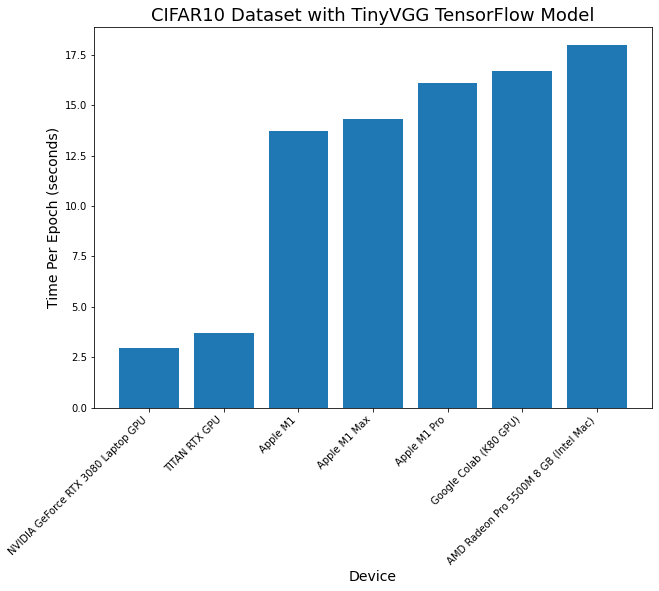

In [6]:
plot_results(results=tinyvgg_results,
             x_col_name="device",
             y_col_name="time_per_epoch",
             title="CIFAR10 Dataset with TinyVGG TensorFlow Model",
             xlabel="Device",
             ylabel="Time Per Epoch (seconds)")

## EfficientNetB0 feature extractor with Food101

Results from notebook code - https://github.com/mrdbourke/m1-machine-learning-test/blob/main/01_food101_effnet_benchmark.ipynb

In [7]:
effnetb0_results = results_df[results_df["model"] == "EfficientNetB0_feature_extract"][["device", "time_per_epoch"]].sort_values("time_per_epoch")
effnetb0_results

,device,time_per_epoch
5,TITAN RTX GPU,92.751
15,NVIDIA GeForce RTX 3080 Laptop GPU,110.543
10,Apple M1 Max,191.790
9,Apple M1 Pro,297.199
11,Google Colab (K80 GPU),424.428
13,AMD Radeon Pro 5500M 8 GB (Intel Mac),606.492
1,Apple M1,677.478


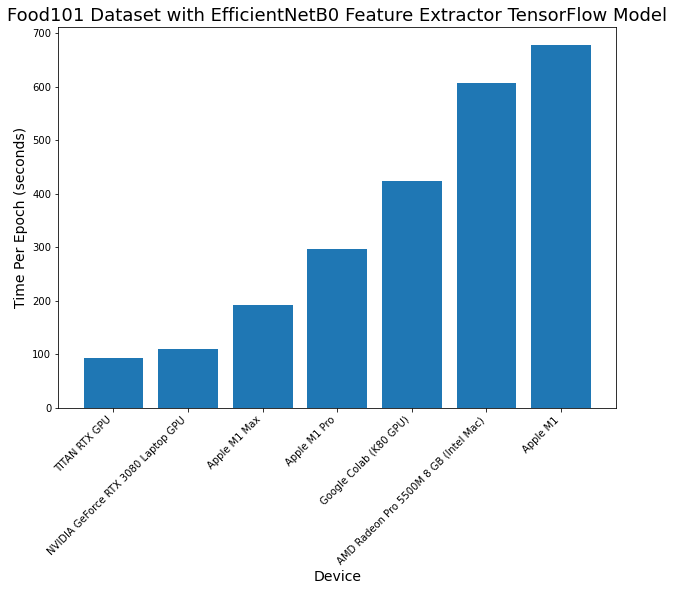

In [8]:
plot_results(results=effnetb0_results,
             x_col_name="device",
             y_col_name="time_per_epoch",
             title="Food101 Dataset with EfficientNetB0 Feature Extractor TensorFlow Model",
             xlabel="Device",
             ylabel="Time Per Epoch (seconds)")

## RandomForestClassifier Cross-validation with California Housing Dataset

Results from notebook code - https://github.com/mrdbourke/m1-machine-learning-test/blob/main/02_random_forest_benchmark.ipynb 

In [9]:
random_forest_results = results_df[results_df["model"] == "RandomForestCV"][["device", "total_train_time"]].sort_values("total_train_time")
random_forest_results

,device,total_train_time
7,NVIDIA GeForce RTX 3080 Laptop GPU,13.776
12,Apple M1 Max,16.244
3,Apple M1 Pro,20.383
18,Intel_Mac,20.424
8,Apple M1,24.099
4,Google Colab,163.964


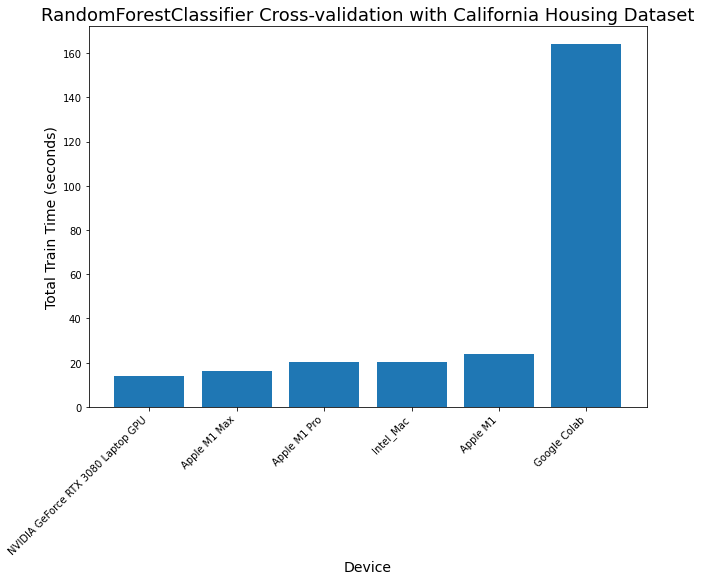

In [10]:
plot_results(results=random_forest_results,
             x_col_name="device",
             y_col_name="total_train_time",
             title="RandomForestClassifier Cross-validation with California Housing Dataset",
             xlabel="Device",
             ylabel="Total Train Time (seconds)")